In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../survey_processing/processed_data/test_fold_2.csv')


In [34]:
available_imagery = []
import os
imagery_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10'
for d in os.listdir(imagery_path):
    if d[-2] == 'S':
        for f in os.listdir(os.path.join(imagery_path, d)):
            available_imagery.append(os.path.join(imagery_path, d, f))
available_centroids = [f.split('/')[-1][:-4] for f in available_imagery]
df = df[df['CENTROID_ID'].isin(available_centroids)]
predict_target = ['h10', 'h3', 'h31', 'h5', 'h7', 'h9', 'hc70', 'hv109', 'hv121', 'hv106', 'hv201', 'hv204', 'hv205', 'hv216', 'hv225', 'hv271', 'v312']
import re
filtered_predict_target = []
for col in predict_target:
    filtered_predict_target.extend(
        [c for c in df.columns if c == col or re.match(f"^{col}_[^a-zA-Z]", c)]
    )
# Drop rows with NaN values in the filtered subset of columns
# train_df = df.dropna(subset=filtered_predict_target)
train_df_info = df.dropna(subset='deprived_sev')[['CENTROID_ID','LATNUM','LONGNUM','YEAR']].reset_index(drop=True)
train_df_features = pd.read_csv('results/split_spatialS_2/X_test.csv')
train_df = pd.concat([train_df_info, train_df_features], axis=1)
train_df.to_csv('results/split_spatialS_2/X_test_with_spatemp.csv')
train_df

,CENTROID_ID,LATNUM,LONGNUM,YEAR,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
0,UG201600000651,-0.350582,32.265813,2016,1.106606,-1.470918,5.624732,0.507497,1.045141,-8.321760,...,0.953505,1.061674,-1.238125,-0.911776,-2.432797,1.340564,0.520398,0.697973,-1.440176,1.207613
1,KE202200001321,0.030258,34.724631,2022,-0.349691,-1.735236,3.042775,-1.054196,1.799548,-7.402573,...,-0.018844,-0.564565,-0.849373,-1.094246,-2.080310,1.102791,0.268643,0.900380,-1.040488,1.622416
2,UG201600000528,0.658938,30.176259,2016,1.566666,-0.460348,5.434221,0.936166,1.311281,-8.304617,...,0.125403,1.686493,-0.835721,-0.165092,-2.431723,1.445284,1.327355,0.261465,-1.186435,0.646574
3,MD202100000184,-22.142155,46.771521,2021,1.715161,-0.645624,4.968461,0.869864,1.154524,-5.330709,...,1.064719,1.049412,-1.545925,-0.699646,-1.236428,0.619895,1.075201,1.449878,-2.407764,-1.010320
4,ET201600000070,9.519401,35.863469,2016,1.820354,-3.749054,5.658112,0.663972,1.807473,-7.778360,...,1.540372,2.359745,-1.391512,1.495836,-3.047957,2.388629,1.661173,0.798719,-0.773805,-0.358979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,MW201500000354,-15.733907,35.071951,2015,0.215725,-2.053072,7.320258,0.341470,1.797601,-6.454486,...,0.995095,1.436571,-1.856260,0.296102,-2.479855,0.950943,0.663374,0.169915,0.243481,1.188904
1712,KE202200000584,-1.643909,37.431753,2022,0.717858,-1.228144,3.586372,-0.543857,0.761357,-7.305182,...,0.538775,-0.354943,-1.205385,-1.375176,-2.300227,1.152312,-0.010656,1.389033,-1.437455,1.522544
1713,BU201600000289,-2.943935,29.803321,2016,0.520585,-1.972828,4.371601,-0.038941,0.815122,-8.191144,...,0.509229,0.529068,-1.477136,-1.630282,-3.132839,1.353604,0.026056,1.425780,-1.248265,1.201754
1714,RW201900000037,-1.617205,29.852331,2019,0.888987,-2.093682,2.600877,-0.904747,0.937713,-6.814337,...,0.144375,-0.177827,-1.328209,-2.476449,-2.682261,1.351128,-0.361894,1.417295,-2.032449,1.649384


In [38]:
df.dropna(subset='deprived_sev')['deprived_sev']

1       0.742857
3       0.637681
7       0.937500
8       1.000000
9       1.000000
          ...   
4834    0.000000
4835    0.962963
4837    0.750000
4838    0.578125
4842    0.075000
Name: deprived_sev, Length: 1716, dtype: float64

In [40]:
sum(df.dropna(subset='deprived_sev').reset_index()['deprived_sev'] == pd.read_csv('results/split_spatialS_2/y_test.csv')['target'])

1716

In [4]:
pd.read_csv('results/split_spatialS_2/y_train.csv')

,target
0,1.000000
1,0.206897
2,0.720930
3,0.915789
4,0.150000
...,...
6929,0.066667
6930,0.416667
6931,0.128205
6932,0.577778


In [4]:
predict_target = ['h10', 'h3', 'h31', 'h5', 'h7', 'h9', 'hc70', 'hv109', 'hv121', 'hv106', 'hv201', 'hv204', 'hv205', 'hv216', 'hv225', 'hv271', 'v312']
import re

filtered_predict_target = []
for col in predict_target:
    filtered_predict_target.extend(
        [c for c in df.columns if c == col or re.match(f"^{col}_[^a-zA-Z]", c)]
    )

In [8]:
len(filtered_predict_target)
df.dropna(subset=filtered_predict_target)

,CENTROID_ID,SURVEY_NAME,COUNTRY,YEAR,LATNUM,LONGNUM,cluster,health_vac_moddep,health_con_moddep,health_ari_moddep,...,hv121_1,h9_1,hv109_1,h9_2,v312_9,h5_2,h7_0,hv201_46,h9_8,hv201_14
0,UG201100000380,Uganda_DHS_2011,Uganda,2011,2.230225,32.626881,380.0,0.000000,0.000000,0.0,...,0.0,0.043478,0.666667,0.028986,0.0,0.014493,0.072464,0.0,0.0,0.000000
1,KM201200000103,Comoros_DHS_2012,Comoros,2012,-12.140858,44.431234,103.0,0.037975,0.012658,0.0,...,0.0,0.000000,0.363636,0.181818,0.0,0.181818,0.181818,0.0,0.0,0.000000
2,ZM201300000646,Zambia_DHS_2013,Zambia,2013,-15.435109,28.246664,646.0,0.050000,0.000000,0.0,...,0.0,0.225000,0.400000,0.025000,0.0,0.025000,0.050000,0.0,0.0,0.000000
3,UG201600000651,Uganda_DHS_2016,Uganda,2016,-0.350582,32.265813,651.0,0.014286,0.000000,0.0,...,0.0,0.170213,0.382979,0.021277,0.0,0.000000,0.021277,0.0,0.0,0.042553
4,SZ200600000088,Eswatini_DHS_2006,Eswatini,2006,-26.249146,31.231366,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.714286,0.071429,0.0,0.071429,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19356,RW201900000037,Rwanda_DHS_2019,Rwanda,2019,-1.617205,29.852331,37.0,0.000000,0.000000,0.0,...,0.0,0.161290,0.500000,0.000000,0.0,0.000000,0.032258,0.0,0.0,0.516129
19360,RW201000000374,Rwanda_DHS_2010,Rwanda,2010,-1.843207,29.783921,374.0,0.000000,0.000000,0.0,...,0.0,0.177778,0.511111,0.066667,0.0,0.044444,0.000000,0.0,0.0,0.000000
19361,TZ201500000364,Tanzania_DHS_2015,Tanzania,2015,-1.360759,31.131786,364.0,0.000000,0.000000,0.0,...,0.0,0.153846,0.410256,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.205128
19365,ZW201000000174,Zimbabwe_DHS_2010,Zimbabwe,2010,-17.214423,30.921253,174.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.413043,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
df.dropna(subset=['exposed_preg'], inplace=True)
np.mean(np.abs(df['exposed_preg'] - df['exposed_preg'].mean()))

In [19]:
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error


# Step 1: Prepare the input and output data
X = df[['LATNUM', 'LONGNUM']]  # Input features: LATNUM and LONGNUM
y = df['exposed_preg']  # Target variable
# Step 1: Logistic Regression for zero vs non-zero prediction
y_binary = (y > 0).astype(int)  # Create binary outcome: 1 if exposed_preg > 0, else 0
log_reg = LogisticRegression()
log_reg.fit(X, y_binary)

# Predict the probability of being non-zero (i.e., non-zero pregnancy exposure)
prob_non_zero = log_reg.predict_proba(X)[:, 1]

# Step 2: GP Regression on the non-zero cases
# Filter the non-zero cases for regression
non_zero_mask = y > 0
X_non_zero = X[non_zero_mask]
y_non_zero = y[non_zero_mask]

# Use a kernel (e.g., Matern kernel) for GP regression on non-zero cases
from sklearn.gaussian_process.kernels import Matern

kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e1), nu=1.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

gp.fit(X_non_zero, y_non_zero)

# Make predictions
y_pred_non_zero, sigma = gp.predict(X_non_zero, return_std=True)

/rds/project/rds-KNoCjrg2atA/cs-yang3/envs/sat/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [ ]:

# To make predictions, apply inverse logit transformation on predicted values
def inv_logit(x):
    return 1 / (1 + np.exp(-x))

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the kernel
# The kernel defines the covariance structure of the GP. You can experiment with different kernels.
# We use a combination of a constant kernel and an RBF kernel (Radial Basis Function)
kernel = C(1.0, (1e-4, 1e1)) * RBF(length_scale=1.0, length_scale_bounds=(1e-4, 1e1))

# Step 4: Create and fit the Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)


gp.fit(X_train, y_train)

# Step 5: Make predictions
y_pred, sigma = gp.predict(X_test, return_std=True)  # return_std=True gives uncertainty estimates

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Predictions: {y_pred}")
print(f"Prediction Uncertainty (std dev): {sigma}")

Text(0.5, 0, 'exposed_preg')

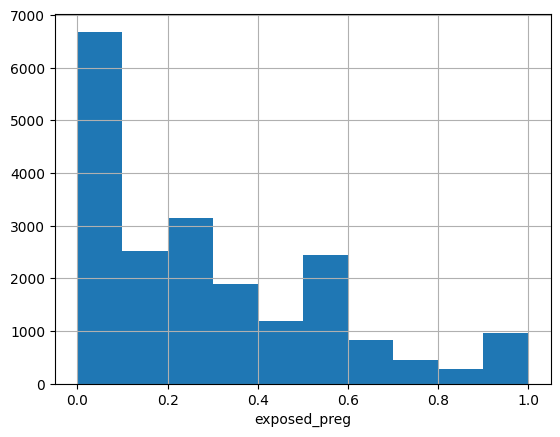

In [3]:
df['exposed_preg'].hist()
import matplotlib.pyplot as plt
plt.xlabel('exposed_preg')

In [5]:
available_imagery = []
import os
imagery_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/wca_10'
imagery_source = 'L'
for d in os.listdir(imagery_path):
    if d[-2] == imagery_source:
        for f in os.listdir(os.path.join(imagery_path, d)):
            available_imagery.append(os.path.join(imagery_path, d, f))
available_centroids = [f.split('/')[-1][:-4] for f in available_imagery]
train_df = df[df['CENTROID_ID'].isin(available_centroids)]
len(available_centroids), len(train_df)

(27572, 509)

In [1]:
import torch
print(torch.cuda.is_available())

True


In [1]:
import torch
import rasterio
from torchvision import transforms

# Load the DINO ResNet model from Torch Hub
dino_resnet = torch.hub.load('facebookresearch/dino:main', 'dino_resnet50')

# Define the path to the TIFF file
tif_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10/ZW2015S2/ZW201500000303.tif'

# Open the TIFF file with rasterio
with rasterio.open(tif_path) as src:
    # Read bands 4 (NIR), 3 (Red), 2 (Green)
    nir = src.read(4)  # Band 4
    red = src.read(3)  # Band 3
    green = src.read(2) # Band 2
    
    # Stack bands to create a 3D array (3 channels)
    # Reordering to match the model's RGB input
    rgb_image = torch.tensor([red, green, nir], dtype=torch.float32)

# Normalize the image to the range [0, 1]
rgb_image /= 3000

# Convert the image to a format suitable for the model
# DINO ResNet expects a tensor of shape [batch_size, 3, height, width], so we add a batch dimension
rgb_image = rgb_image.unsqueeze(0)  # Add batch dimension

# Define preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize(224),  # Resize to match DINO's expected input size
    transforms.ToTensor(),   # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalization based on ImageNet
                         std=[0.229, 0.224, 0.225])
])

# Apply the preprocessing to the image
preprocessed_image = preprocess(rgb_image)

# Pass the preprocessed image through the DINO ResNet model
output = dino_resnet(preprocessed_image)

# output is a tensor with the model's predictions
print(output)

Using cache found in /home/cs-yang3/.cache/torch/hub/facebookresearch_dino_main
/rds/project/rds-KNoCjrg2atA/cs-yang3/envs/sat/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/rds/project/rds-KNoCjrg2atA/cs-yang3/envs/sat/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_3544858/1841289322.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  rgb_image = torch.tensor([red, green, 

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>